In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline
# %matplotlib notebook

plt.rcParams["figure.figsize"] = (10,6)
# plt.rcParams['figure.dpi'] = 100

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#pd.options.display.max_rows = 1000
#pd.options.display.max_columns = 150

In [2]:
df=pd.read_csv("adult.csv")

## 1) General Overview

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,10.078,1079.068,87.502,40.422
std,13.711,105604.025,2.571,7452.019,403.005,12.391
min,17.000,12285.000,1.000,0.000,0.000,1.000
25%,28.000,117550.500,9.000,0.000,0.000,40.000
50%,37.000,178144.500,10.000,0.000,0.000,40.000
75%,48.000,237642.000,12.000,0.000,0.000,45.000
max,90.000,1490400.000,16.000,99999.000,4356.000,99.000


In [6]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [7]:
df.sample(10).T

,45481,8214,10364,20566,37979,36904,6423,6269,8992,47330
age,32,46,66,59,32,23,37,34,33,27
workclass,Private,Local-gov,?,Private,?,Private,Local-gov,Local-gov,Private,Private
fnlwgt,159589,126524,249043,168569,256371,214635,188612,63338,154227,167737
education,HS-grad,Bachelors,11th,HS-grad,12th,HS-grad,Masters,HS-grad,Some-college,Some-college
educational-num,9,13,7,9,8,9,14,9,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married,Never-married,Married-civ-spouse,Never-married,Married-civ-spouse,Never-married
occupation,Handlers-cleaners,Prof-specialty,?,Machine-op-inspct,?,Craft-repair,Exec-managerial,Adm-clerical,Machine-op-inspct,Handlers-cleaners
relationship,Own-child,Wife,Husband,Husband,Own-child,Not-in-family,Husband,Own-child,Husband,Not-in-family
race,White,White,White,White,Black,White,White,White,White,White
gender,Male,Female,Male,Male,Female,Male,Male,Female,Male,Male


*** I see some columns contain "?". Now, I wan to find out which contains that**  

In [8]:
dic={"any":df.isin(["?"]).any(),"sum":df.isin(["?"]).sum()}

In [9]:
X=pd.DataFrame(dic)

In [10]:
X

,any,sum
age,False,0
workclass,True,2799
fnlwgt,False,0
education,False,0
educational-num,False,0
marital-status,False,0
occupation,True,2809
relationship,False,0
race,False,0
gender,False,0


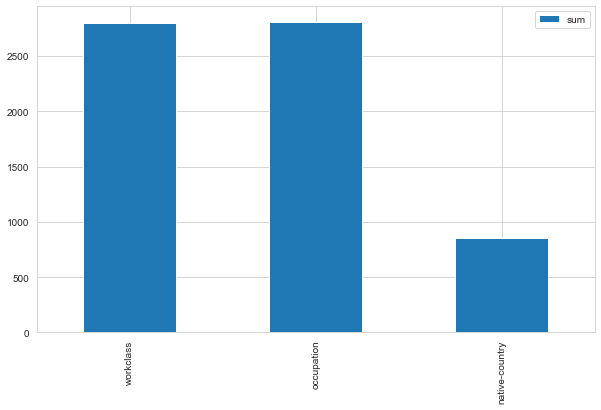

In [11]:
X[X["sum"]>0].plot(kind="bar");

## Data-Cleaning

### 1) Workclass

In [12]:
df.replace("?",np.NaN,inplace=True)

### 2) 'Education'-'Educational-num'

In [13]:
df.groupby("educational-num")["education"].value_counts(dropna=False)

educational-num  education   
1                Preschool          83
2                1st-4th           247
3                5th-6th           509
4                7th-8th           955
5                9th               756
6                10th             1389
7                11th             1812
8                12th              657
9                HS-grad         15784
10               Some-college    10878
11               Assoc-voc        2061
12               Assoc-acdm       1601
13               Bachelors        8025
14               Masters          2657
15               Prof-school       834
16               Doctorate         594
Name: education, dtype: int64

**As we see here each value in one column match to each values in another column. That's why we can drop one of them**

In [14]:
df.drop("educational-num",axis=1,inplace=True)

## 3) Marital Status-Relationship

In [15]:
df["marital-status"].value_counts(dropna=False)

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [16]:
df["relationship"].value_counts(dropna=False)

Husband           19716
Not-in-family     12583
Own-child          7581
Unmarried          5125
Wife               2331
Other-relative     1506
Name: relationship, dtype: int64

In [17]:
df.groupby("relationship")["marital-status"].value_counts(dropna=False)

relationship    marital-status       
Husband         Married-civ-spouse       19704
                Married-AF-spouse           12
Not-in-family   Never-married             7114
                Divorced                  3628
                Widowed                    851
                Separated                  637
                Married-spouse-absent      330
                Married-civ-spouse          23
Other-relative  Never-married              920
                Married-civ-spouse         201
                Divorced                   181
                Separated                   79
                Widowed                     70
                Married-spouse-absent       54
                Married-AF-spouse            1
Own-child       Never-married             6750
                Divorced                   455
                Separated                  146
                Married-civ-spouse         143
                Married-spouse-absent       61
                Widowe

In [18]:
df["relationship"].replace(["Own-child","Other-relative","Not-in-family"],"Unmarried",inplace=True)

In [19]:
df["relationship"].value_counts(dropna=False)

Unmarried    26795
Husband      19716
Wife          2331
Name: relationship, dtype: int64

In [20]:
df["relationship"].replace(["Husband","Wife"],"Married",inplace=True)

In [21]:
df.drop("marital-status",axis=1,inplace=True)

## OUTLIERS - Missing Values

**In this part I want to observe whether there is outlier in the columns. It is not simple to find out and decide if there is any outlier**

### 1) Age

In [22]:
df.describe() # IQR=0.75-0.25

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,48842.000,48842.000,48842.000,48842.000,48842.000
mean,38.644,189664.135,1079.068,87.502,40.422
std,13.711,105604.025,7452.019,403.005,12.391
min,17.000,12285.000,0.000,0.000,1.000
25%,28.000,117550.500,0.000,0.000,40.000
50%,37.000,178144.500,0.000,0.000,40.000
75%,48.000,237642.000,0.000,0.000,45.000
max,90.000,1490400.000,99999.000,4356.000,99.000


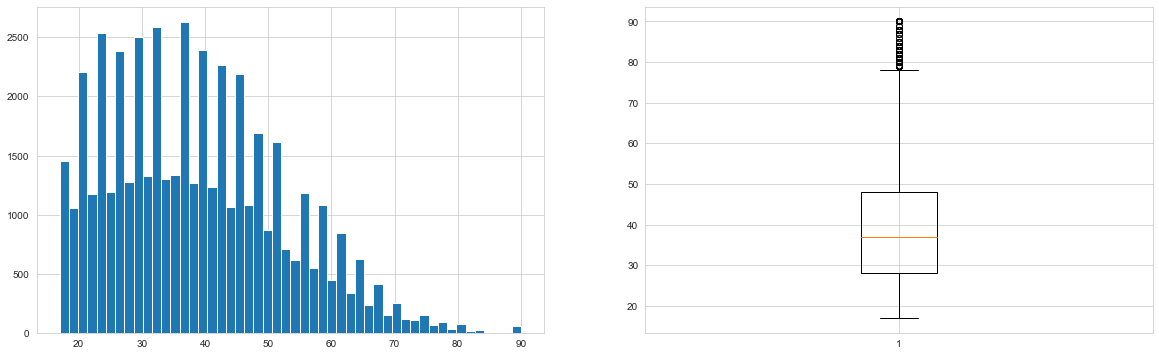

In [23]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df.age, bins=50)

plt.subplot(122)
plt.boxplot(df.age, whis=1.5)

plt.show()

In [24]:
Q1=df.age.quantile(0.25)
Q3=df.age.quantile(0.75)
IQR=Q3-Q1
lower=Q1-IQR*1.5
upper=Q3+IQR*1.5

In [25]:
lower,upper

(-2.0, 78.0)

**We have no value less than 17 in age. That's why I won't use "-2". Definitely it would't be "-2"**

In [26]:
df1=df[(df.age>upper)]

In [27]:
df1[["age","hours-per-week","income"]].sample(10)

,age,hours-per-week,income
39740,83,50,>50K
35970,80,20,<=50K
14033,87,3,<=50K
33890,79,45,>50K
37234,80,8,<=50K
10735,90,40,>50K
36530,80,24,<=50K
11289,79,40,<=50K
32804,79,40,>50K
41584,90,15,<=50K


### 2) WorkClass

In [28]:
df["workclass"].value_counts(dropna=False)

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
NaN                  2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [29]:
df["workclass"].fillna(df.groupby(["income","education"])["workclass"].transform(lambda x: x.mode()[0]),inplace=True)

In [30]:
df["workclass"]=df["workclass"].replace(["Local-gov","State-gov","Federal-gov"],"Gov")

In [31]:
df["workclass"]=df["workclass"].replace(["Self-emp-not-inc","Self-emp-inc"],"Private")

**Since we have nothing to do with "income=0", I'd drop these values. I guess if someone works with "Without-pay" or "Never-worked" there would be no income.**

In [32]:
df[(df["workclass"]=="Without-pay") | (df["workclass"]=="Never-worked")].index

Int64Index([ 2957,  3177,  6466,  8785,  8903, 10647, 11607, 13836, 13898,
            14034, 18182, 21642, 25538, 27126, 31053, 31814, 31976, 33093,
            36354, 36618, 38225, 38496, 39513, 40877, 41781, 44028, 45110,
            45439, 48543, 48585, 48595],
           dtype='int64')

In [33]:
df.drop(index=(df[(df["workclass"]=="Without-pay") | (df["workclass"]=="Never-worked")].index),axis=0,inplace=True)

In [34]:
df.reset_index(drop=True,inplace=True)

In [35]:
df.drop("fnlwgt",axis=1,inplace=True)

### 3) Occupation

In [38]:
df['occupation'].value_counts(dropna=False)

Craft-repair         7121
Prof-specialty       6474
Adm-clerical         6461
Exec-managerial      6204
Sales                5503
Other-service        5432
Machine-op-inspct    3020
Transport-moving     2358
Handlers-cleaners    2070
Farming-fishing      1482
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: occupation, dtype: int64

In [37]:
df["occupation"].fillna(df.groupby(["education","income"])["occupation"].transform(lambda x: x.mode()[0]),inplace=True)

### 4) race

In [39]:
df["race"].value_counts(dropna=False)

White                 41736
Black                  4681
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: race, dtype: int64

In [40]:
df["race"]=df["race"].replace("Asian-Pac-Islander","White")
df["race"]=df["race"].replace("Amer-Indian-Eskimo","Black")

In [41]:
df["race"]=df["race"].replace("Other",np.NaN)

In [42]:
df["race"].fillna(method="ffill",inplace=True)

In [43]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'relationship', 'race',
       'gender', 'capital-gain', 'capital-loss', 'hours-per-week',
       'native-country', 'income'],
      dtype='object')

### 5) Capital-gain, Capital-loss

In [44]:
df.drop(["capital-gain","capital-loss"],axis=1,inplace=True)

### 6) Hours-per-week

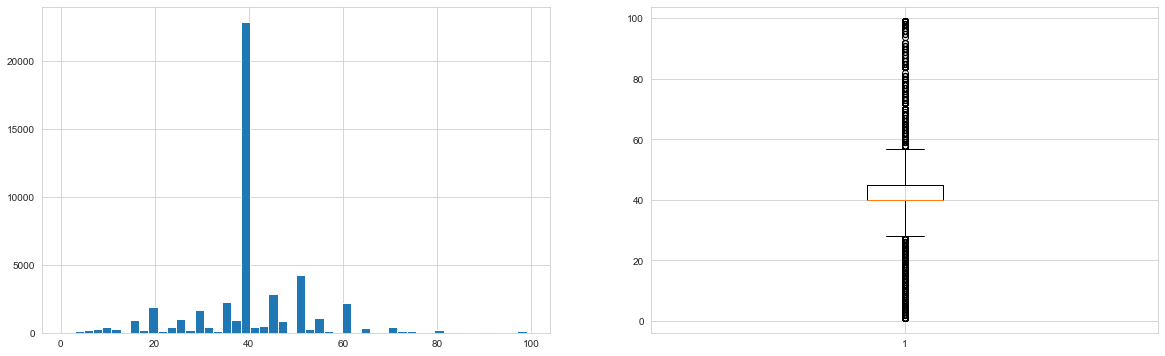

In [45]:
plt.figure(figsize=(20, 6))

plt.subplot(121)
plt.hist(df['hours-per-week'], bins=50)

plt.subplot(122)
plt.boxplot(df['hours-per-week'], whis=2.5)

plt.show()

In [46]:
Q11=df['hours-per-week'].quantile(0.25)
Q33=df['hours-per-week'].quantile(0.75)
IQR=Q33-Q11
lower1=Q11-IQR*1.5
upper1=Q33+IQR*1.5

In [47]:
lower1,upper1

(32.5, 52.5)

In [50]:
df[(df['hours-per-week']<32.5) | (df['hours-per-week']>52.5)]

,age,workclass,education,occupation,relationship,race,gender,hours-per-week,native-country,income
4,18,Private,Some-college,Adm-clerical,Unmarried,White,Female,30,United-States,<=50K
5,34,Private,10th,Other-service,Unmarried,White,Male,30,United-States,<=50K
7,63,Private,Prof-school,Prof-specialty,Married,White,Male,32,United-States,>50K
9,55,Private,7th-8th,Craft-repair,Married,White,Male,10,United-States,<=50K
16,20,Gov,Some-college,Other-service,Unmarried,White,Male,25,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...
48794,31,Private,Masters,Other-service,Unmarried,White,Female,30,United-States,<=50K
48795,39,Gov,Assoc-acdm,Adm-clerical,Married,White,Female,20,United-States,>50K
48798,65,Private,Prof-school,Prof-specialty,Unmarried,White,Male,60,United-States,<=50K
48803,32,Private,Masters,Tech-support,Unmarried,White,Male,11,Taiwan,<=50K


**I think it is possible someone can work less than "lower1" but it is tough the working more than "upper1". I think if someone is more than 65 he can't work so long.**

In [56]:
df[(df['hours-per-week']>52.5) & (df["income"]=="<=50K")].index

Int64Index([   27,    29,    54,   120,   173,   183,   194,   205,   235,
              241,
            ...
            48719, 48722, 48726, 48737, 48745, 48750, 48770, 48773, 48781,
            48798],
           dtype='int64', length=3058)

In [57]:
df.drop(index=df[(df['hours-per-week']>52.5) & (df["income"]=="<=50K")].index, axis=0,inplace=True)

In [61]:
df.drop(index=df[df['hours-per-week']>60].index,axis=0,inplace=True)

In [64]:
df.reset_index(drop=True,inplace=True)

### 7) Native-country

In [129]:
df['native-country'].value_counts(dropna=False)

United-States                 44581
Mexico                          969
Philippines                     297
Germany                         211
Puerto-Rico                     188
Canada                          185
El-Salvador                     161
India                           156
Cuba                            140
England                         130
China                           125
South                           115
Jamaica                         108
Dominican-Republic              107
Italy                           106
Japan                            93
Vietnam                          91
Guatemala                        90
Columbia                         87
Poland                           87
Haiti                            76
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           50
Nicaragua                        49
Peru                             48
Ecuador                     

In [128]:
df['native-country'].fillna(method="ffill",inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45154 entries, 0 to 45153
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45154 non-null  int64 
 1   workclass       45154 non-null  object
 2   education       45154 non-null  object
 3   occupation      45154 non-null  object
 4   relationship    45154 non-null  object
 5   race            45154 non-null  object
 6   gender          45154 non-null  object
 7   hours-per-week  45154 non-null  int64 
 8   native-country  44366 non-null  object
 9   income          45154 non-null  object
dtypes: int64(2), object(8)
memory usage: 3.4+ MB


# Questions

In [84]:
df.head(1).T

,0
age,25
workclass,Private
education,11th
occupation,Machine-op-inspct
relationship,Unmarried
race,Black
gender,Male
hours-per-week,40
native-country,United-States
income,<=50K


### 1) What is the average age of men/women?

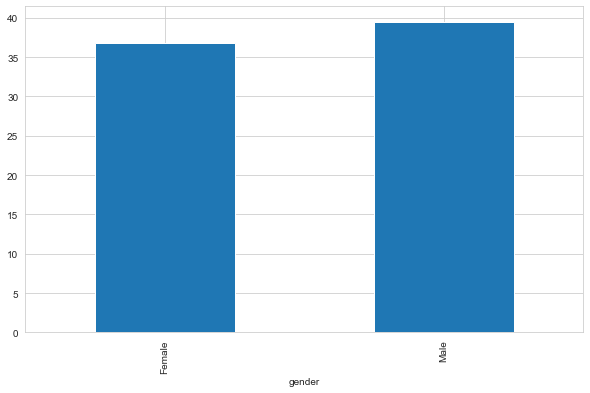

In [88]:
df.groupby("gender").age.mean().plot(kind="bar");

In [100]:
df.groupby("gender").age.mean().round(3)

gender
Female   36.813
Male     39.495
Name: age, dtype: float64

### 2) What is the distribution of occupation?

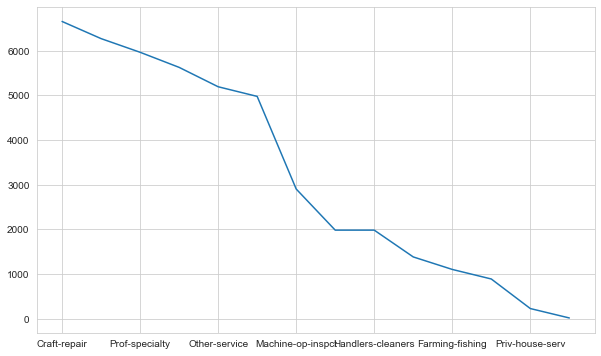

In [104]:
df["occupation"].value_counts(dropna=False).plot();

### 3) What percentage of people with advanced education (Bachelors, Masters, Doctorate) make more than 50K ?

In [114]:
a=df[(df.education.isin(["Bachelors","Masters"])) & (df.income==">50K")].shape[0]

In [115]:
b=df.shape[0]

In [119]:
perc=(a/b)*100

In [122]:
print(f"Percentage of people with advanced education make more than 50 K : {round(perc,2)}")

Percentage of people with advanced education make more than 50 K : 10.13


### 4) What percentage of the people who work the minimum number of hours per week have a income of > 50 K ?

In [126]:
df.columns

Index(['age', 'workclass', 'education', 'occupation', 'relationship', 'race',
       'gender', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [136]:
e=df[(df["income"]==">50K") & (df["hours-per-week"]==df["hours-per-week"].min())].shape[0]

In [137]:
f=df[df["hours-per-week"]==df["hours-per-week"].min()].shape[0]

In [138]:
pec2=(e/f)*100

In [139]:
print(f"percentage of the people who work the minimum number of hours per week have a income of > 50 K : {round(pec2,2)}")

percentage of the people who work the minimum number of hours per week have a income of > 50 K : 11.11


### 5) What country has the highest percentage of people that earn > 50 K ?

In [157]:
a5=df[df["income"]==">50K"].groupby("native-country")["income"].count()

In [158]:
b5=df[df["income"]==">50K"].groupby("native-country")["income"].count().sum()

In [167]:
c5=pd.DataFrame(a5/b5)

In [177]:
c5.loc[c5.income==c5.income.max()]

,income
native-country,
United-States,0.933


### 6) Identify the most popular occupation for those who earn > 50 K in India.

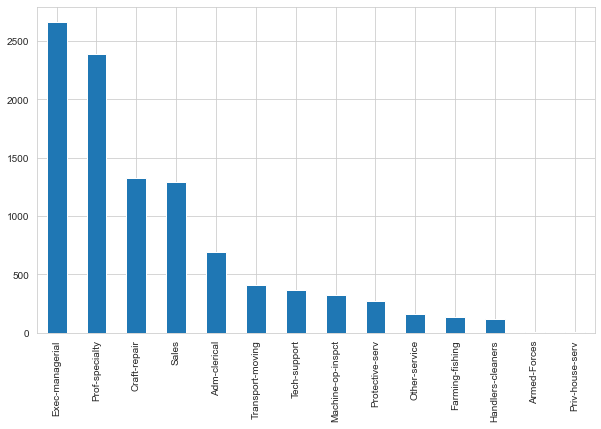

In [185]:
df[(df["native-country"]=="United-States") & (df["income"]==">50K")]["occupation"].value_counts(dropna=False).plot(kind="bar");

In [187]:
df1=df.select_dtypes(exclude=["int","float"])

In [191]:
first=pd.get_dummies(df1,drop_first=True)

In [192]:
second=df.select_dtypes(include=["int","float"])

In [194]:
second

,age,hours-per-week
0,25,40
1,38,50
2,28,40
3,44,40
4,18,30
...,...,...
45149,27,38
45150,40,40
45151,58,40
45152,22,20


In [197]:
get_dummy=pd.concat([first,second],axis=1)

In [198]:
get_dummy.to_csv('get_dummy.csv')